<a href="https://colab.research.google.com/github/mepky/opencv/blob/master/Extract_Frames_from_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment** 



* Procedure to solve this problem statements.

1. Video has converted into several image frames.
2. Load all images to make csv files with different column name as assset1 and asset2.
3. Feature extraction 
4. Set up CNN Model, trian on image data asset1 and asset2 .
5. Test model on test data






In [83]:
pwd

'/content'

I want to store all the images into csv file.


Couldn't make csv file with 3 dimensional array of images.

I converted image into numpy array but could decreade the dimension through normal resize methods, and 3 dimenstional array could not be implemented in csv file

Size of the images

In [0]:
import matplotlib.pyplot as plt

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [0]:
import os
base_dir='test'
os.mkdir(base_dir)

In [0]:
base_dir='asset1'
os.mkdir(base_dir)

In [0]:
base_dir='asset2'
os.mkdir(base_dir)

In [0]:
!unzip asset1.zip -d asset1

In [0]:
!unzip asset2.zip -d asset2

In [0]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# to read images from each file and assigning it a label
def load_images_from_folder(folder):
    images = []
    lables=[]
    c=-2
    d={}
    for file in os.listdir(folder):
        c+=1
        d[file]=c
        for filename in os.listdir(os.path.join(folder,file)):
            img = cv2.imread(os.path.join(folder,file,filename))
            if img is not None:
                images.append(img)
                lables.append([c])
    return images,lables

In [159]:
np.array(lables).shape

(1413, 3)

In [133]:
base_dir='dataset'
os.mkdir(base_dir)

FileExistsError: ignored

In [0]:
folder='dataset'

images,lables=load_images_from_folder(folder)

In [0]:
from keras.utils import to_categorical
lables = to_categorical(lables)

In [181]:
lables

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [182]:
np.array(lables).shape

(1413, 2)

In [137]:
np.array(images).shape

(1413, 352, 640, 3)

In [138]:
print(len(images))

1413


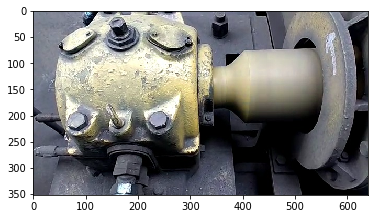

In [139]:

plt.imshow(images[0])

In [140]:
images[0].shape

(352, 640, 3)

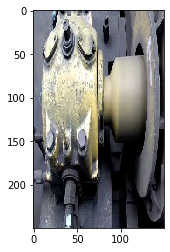

In [141]:
img = cv2.resize(images[0],(150,250))

plt.imshow(img)

In [0]:
#resizeing the images
cleaned_images=[]
for i in range(len(images)):
    #image = cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY)
    #image = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    cleaned_images.append(cv2.resize(images[i],(150,250)))

In [0]:
#splitting the data into two parts that is test and train with train having 1% of the total data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cleaned_images, lables, test_size=0.01, random_state=42)

In [144]:
len(x_train)

1398

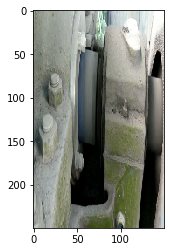

In [145]:
plt.imshow(x_train[0])

In [0]:
x_test=np.array(x_test)
x_train=np.array(x_train)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [186]:
print(x_train.shape)
print(x_test.shape)

(1398, 250, 150, 3)
(15, 250, 150, 3)


In [187]:
from keras.utils import np_utils
import keras

# # one-hot encode the labels
# num_classes = len(np.unique(y_train))
# y_train = keras.utils.to_categorical(y_train, num_classes,10)
# y_test = keras.utils.to_categorical(y_test, num_classes,10)
# break training set into training and validation sets
(x_train, x_valid) = x_train[100:], x_train[:100]
(y_train, y_valid) = y_train[100:], y_train[:100]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (1298, 250, 150, 3)
1298 train samples
15 test samples
100 validation samples


In [188]:

#Our CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(250, 150, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 250, 150, 16)      448       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 125, 75, 16)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 125, 75, 32)       2080      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 62, 37, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 62, 37, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 62, 37, 64)        8256      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 31, 18, 64)       

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [200]:
x_train[0].shape

(250, 150, 3)

Trainin our model

In [190]:
from keras.callbacks import ModelCheckpoint   

# train the model
# checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
#                                save_best_only=True)
hist = model.fit(np.array(x_train), np.array(y_train), batch_size=100, epochs=20,shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





1298/1298 [==============================] - 10s 8ms/step - loss: 3.9298 - acc: 0.7126
Epoch 2/20
1298/1298 [==============================] - 2s 1ms/step - loss: 4.2096 - acc: 0.7388
Epoch 3/20
1298/1298 [==============================] - 2s 1ms/step - loss: 4.2096 - acc: 0.7388
Epoch 4/20
1298/1298 [==============================] - 2s 1ms/step - loss: 4.2096 - acc: 0.7388
Epoch 5/20
1298/1298 [==============================] - 2s 1ms/step - loss: 4.2096 - acc: 0.7388
Epoch 6/20
1298/1298 [==============================] - 2s 1ms/step - loss: 4.2096 - acc: 0.7388
Epoch 7/20
1298/1298 [==============================] - 2s 1ms/step - loss: 4.2096 - acc: 0.7388
Epoch 8/20
1298/1298 [==============================] - 2s 1ms/step - loss: 4.2096 - acc: 0.7388
Epoch 9/20
1298/1298 [==============================] - 2s 1ms/step - loss: 4.2096 - acc: 0.7388
Epoch 10/20
1298/1298 [=

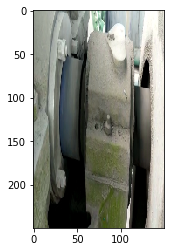

In [191]:
plt.imshow(x_test[0])

In [203]:
x_test[0].shape

(250, 150, 3)

Test images are labeled

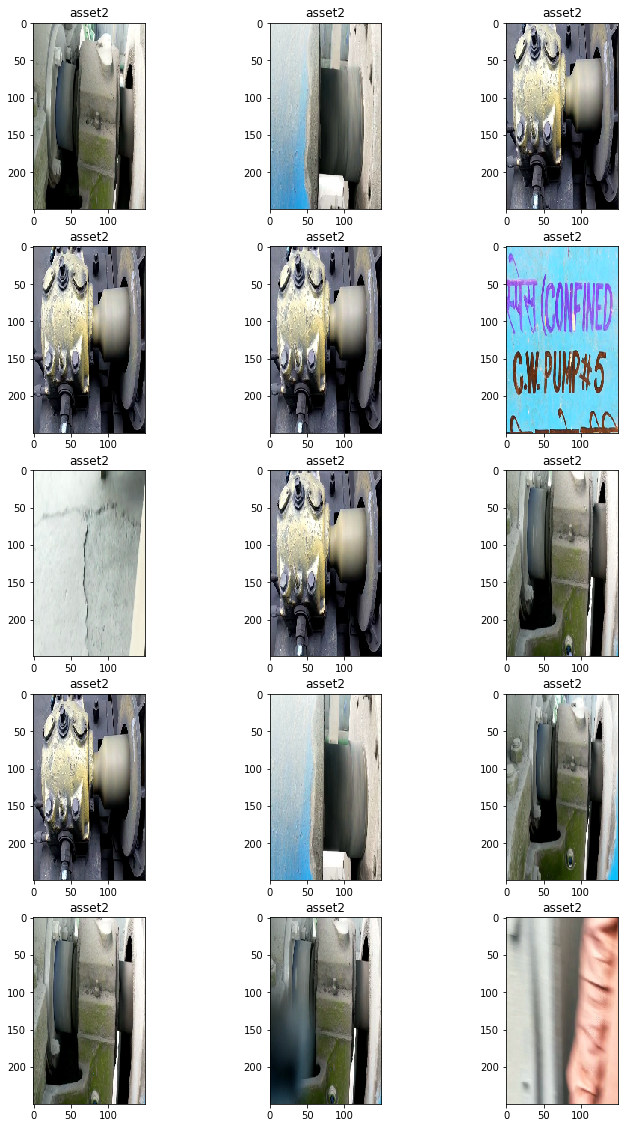

In [229]:
plt.figure(figsize=(12, 24))
for num,image in  enumerate(x_test[:15]):
  test_images = x_test[num].reshape(1, 250,150,3)
  model_output=model.predict(np.array(test_images))
  if np.argmax(model_output)==0:
    label='asset1'
  else:
    label='asset2'
  plt.subplot(6, 3, num+1)
  plt.imshow(image)
  plt.title(label)
plt.show()